<h1 style="background-color:MistyRose; color:HotPink; text-align:center; font-size:50px; font-family: serif; font-weight:bold; text-decoration: none;">
ROAD TRAFFIC ACCIDENTS   <br>
Group number 4
</h1>

<center><img src="https://github.com/NoaKoren123/project1/blob/main/car.jpg?raw=true" alt="Designer Image" style="width: 50%;"/></center>

<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
    Presenting By : <br> <br>
    <span style="color:Black;"> Noa Koren <br> Tevel Yeffet <br>  Topaz Boita </span>
</h1>

<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
    Table of Contents :
</h1> 

Link to source : https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents <br> 

This data set is collected from Addis Ababa Sub city police departments. <br>

Link to github project page :https://github.com/NoaKoren123/project1 <br>

1. [Arranging and clearing the data according to our needs](#section1) <br>

2. [First conclusion](#section2) <br>

3. [Second conclusion](#section3) <br>

4. [Third conclusion](#section4) <br>

5. [Forth conclusion](#section5) <br>

6. [Summary](#section7)   <br>


<a id='section1'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
1. Arranging and clearing the data according to our needs
</h1>
</a>

### Performing import and reading of a database.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import os
import matplotlib.pyplot as plt
from IPython.display import Image

In [8]:
url = "https://raw.githubusercontent.com/NoaKoren123/project1/main/RTA%20Dataset.csv"
df = pd.read_csv(url)

In [9]:
df.head(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury


In [10]:
df.shape

(12316, 32)

In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Checking the indentation of the column title.

In [13]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

### Checking that there are no fields with missing values. (Except what we want).

In [15]:
df.isnull().sum().sort_values(ascending=True)

Time                              0
Pedestrian_movement               0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Casualty_class                    0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions                  0
Road_surface_conditions           0
Cause_of_accident                 0
Accident_severity                 0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Road_allignment                 142
Type_of_collision               155
Road_surface_type               172
Area_accident_occured           239
Vehicle_movement                308
Lanes_or_Medians                385
Owner_of_vehicle                482
Vehicle_driver_relation         579
Educational_level               741
Driving_experience              829
Types_of_Junction               887
Type_of_vehicle             

In [16]:
columns_to_drop = ['Work_of_casuality', 'Fitness_of_casuality', 'Defect_of_vehicle', 'Service_year_of_vehicle']
df_cleaned = df.drop(columns=columns_to_drop) 
df_cleaned = df_cleaned.dropna(thresh=len(df_cleaned.columns) - 15)
df_cleaned.head(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury


### Added a Time Range Column

In [18]:
df_cleaned['Time'] = pd.to_datetime(df['Time'], errors='coerce')
def Time_Range(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 6 <= hour < 12:
        return 'Morning (6 AM - 12 PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (12 PM - 6 PM)'
    elif 18 <= hour < 24:
        return 'Evening (6 PM - 12 AM)'
    else:
        return 'Night (12 AM - 6 AM)'
    
df_cleaned['Time_Range'] = df_cleaned['Time'].dt.hour.apply(Time_Range)
df_cleaned[['Time', 'Time_Range']].head()

C:\Users\321no\AppData\Local\Temp\ipykernel_23180\1970298326.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Time'] = pd.to_datetime(df['Time'], errors='coerce')


,Time,Time_Range
0,2024-06-24 17:02:00,Afternoon (12 PM - 6 PM)
1,2024-06-24 17:02:00,Afternoon (12 PM - 6 PM)
2,2024-06-24 17:02:00,Afternoon (12 PM - 6 PM)
3,2024-06-24 01:06:00,Night (12 AM - 6 AM)
4,2024-06-24 01:06:00,Night (12 AM - 6 AM)


### Added a Hour Column

In [20]:
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])
df_cleaned['Hour'] = df_cleaned['Time'].dt.hour
print(df_cleaned[['Time', 'Hour']])

                     Time  Hour
0     2024-06-24 17:02:00    17
1     2024-06-24 17:02:00    17
2     2024-06-24 17:02:00    17
3     2024-06-24 01:06:00     1
4     2024-06-24 01:06:00     1
...                   ...   ...
12311 2024-06-24 16:15:00    16
12312 2024-06-24 18:00:00    18
12313 2024-06-24 13:55:00    13
12314 2024-06-24 13:55:00    13
12315 2024-06-24 13:55:00    13

[12316 rows x 2 columns]


In [21]:
df_cleaned.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Time_Range', 'Hour'],
      dtype='object')

<a id='section2'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
2. First conclusion- The best and worst time to drive
</h1>
</a>

>**First, we checked the time range and the day of week of the accidents:**

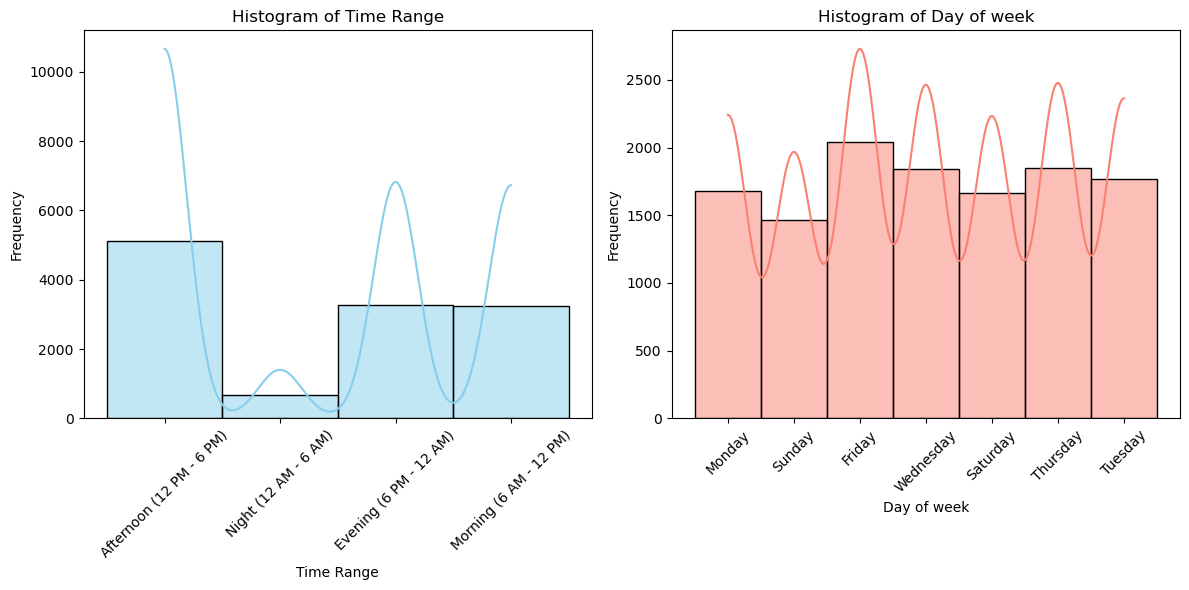

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Time_Range'], bins=15, kde=True, color='skyblue')
plt.title('Histogram of Time Range')
plt.xlabel('Time Range')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Day_of_week'], bins=10, kde=True, color='salmon')
plt.title('Histogram of Day of week')
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

>**The graph on the right presents the most dangerous days of the week are Wednesday,Thursday and Friday** <br>
>**The graph on the left presents the range of hours 6-12pm with the highest accident rate** 

>**Next, we seperated the time range to the exact hours and examined the average number of accidents every day and at every hour of the day:**

In [27]:
hourly_accidents = df_cleaned.groupby('Hour').size().reset_index(name='Accident_count')
hourly_accidents['Mean_accidents'] = hourly_accidents['Accident_count'] / len(df_cleaned['Hour'].unique())
hourly_accidents.head()

,Hour,Accident_count,Mean_accidents
0,0,206,8.583333
1,1,134,5.583333
2,2,84,3.500000
3,3,84,3.500000
4,4,91,3.791667


In [28]:
daily_accidents = df_cleaned.groupby('Day_of_week').size().reset_index(name='Accident_count')
daily_accidents['Mean_accidents'] = daily_accidents['Accident_count'] / len(df_cleaned['Day_of_week'].unique())
daily_accidents.head()

,Day_of_week,Accident_count,Mean_accidents
0,Friday,2041,291.571429
1,Monday,1681,240.142857
2,Saturday,1666,238.000000
3,Sunday,1467,209.571429
4,Thursday,1851,264.428571


>**Next, we checked to see the average of accidents both per hour and per day.**

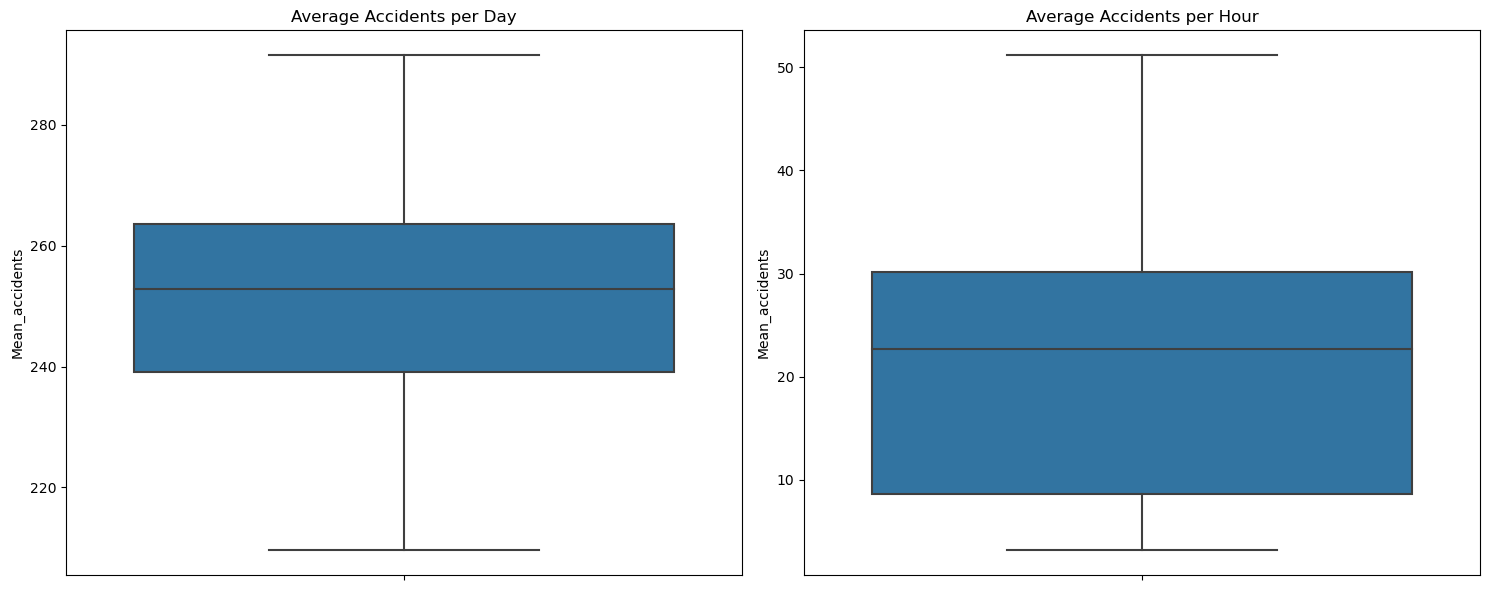

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(y='Mean_accidents', data=daily_accidents, ax=ax1)
ax1.set_title('Average Accidents per Day')
sns.boxplot(y='Mean_accidents', data=hourly_accidents, ax=ax2)
ax2.set_title('Average Accidents per Hour')
plt.tight_layout()
plt.show()

>**We can see in Boxplot those that we have no exceptions.**

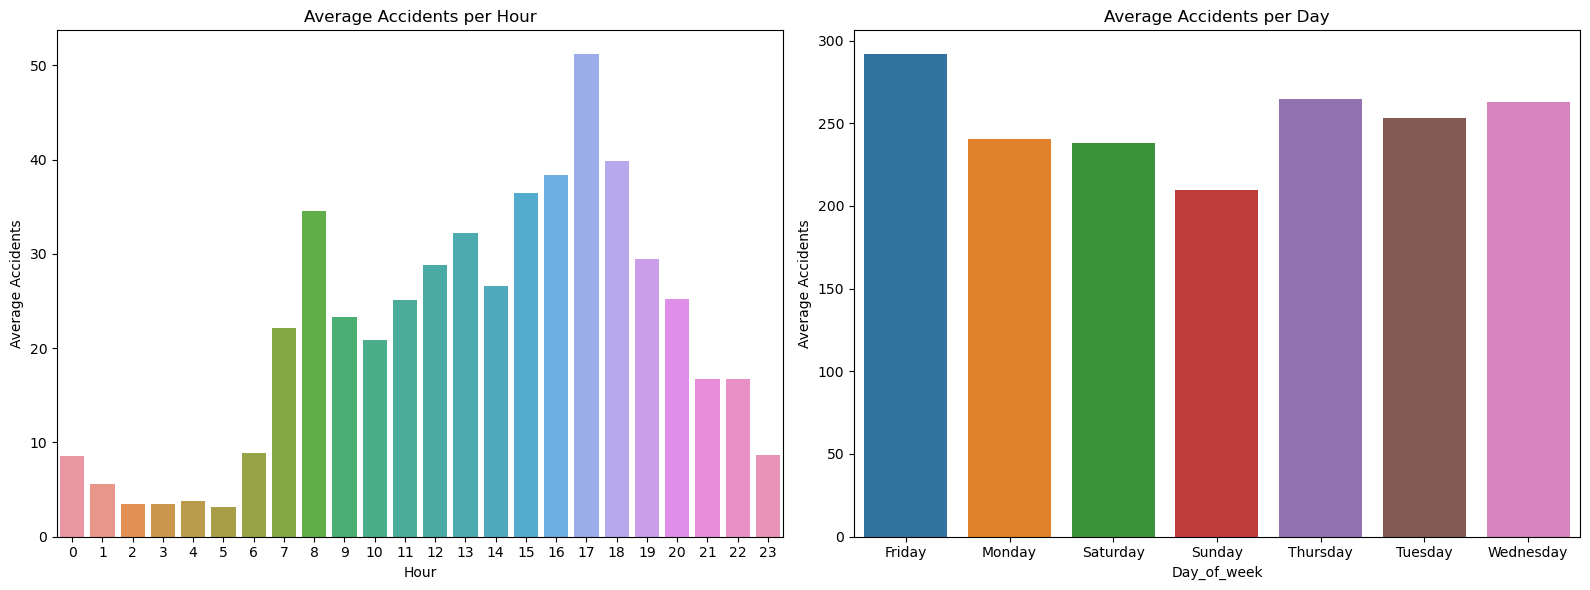

In [32]:
plt.figure(figsize=(16, 6))  

plt.subplot(1, 2, 1)
Mean_Hour = hourly_accidents.reset_index()
ax1 = sns.barplot(x='Hour', y='Mean_accidents', data=Mean_Hour)
ax1.set_title('Average Accidents per Hour')
ax1.set_ylabel('Average Accidents')  

plt.subplot(1, 2, 2)
Mean_day = daily_accidents.reset_index()
ax2 = sns.barplot(x='Day_of_week', y='Mean_accidents', data=Mean_day)
ax2.set_title('Average Accidents per Day')
ax2.set_ylabel('Average Accidents')  

plt.tight_layout()
plt.show()

>**We concluded that the most dangerous day of the week is Friday. Additionally, the highest accident rate is at 5 p.m. (more specifically the range is 2-6 p.m.) followed by 8 a.m.**<br><br>
>**In Addis Ababa, the capital city of Ethiopia, the concept of weekdays aligns with the global standard. The work week typically consists of Monday through Friday, with Saturday and Sunday considered weekend days. Rush hour times are generally during morning and evening peak hours.<br>
>Additionally, there are no specific restrictions on weekend road travel.**

>**Next, We examined a correlation between the number of accidents that occur every hour of the day and the number of accidents that occur each day.**

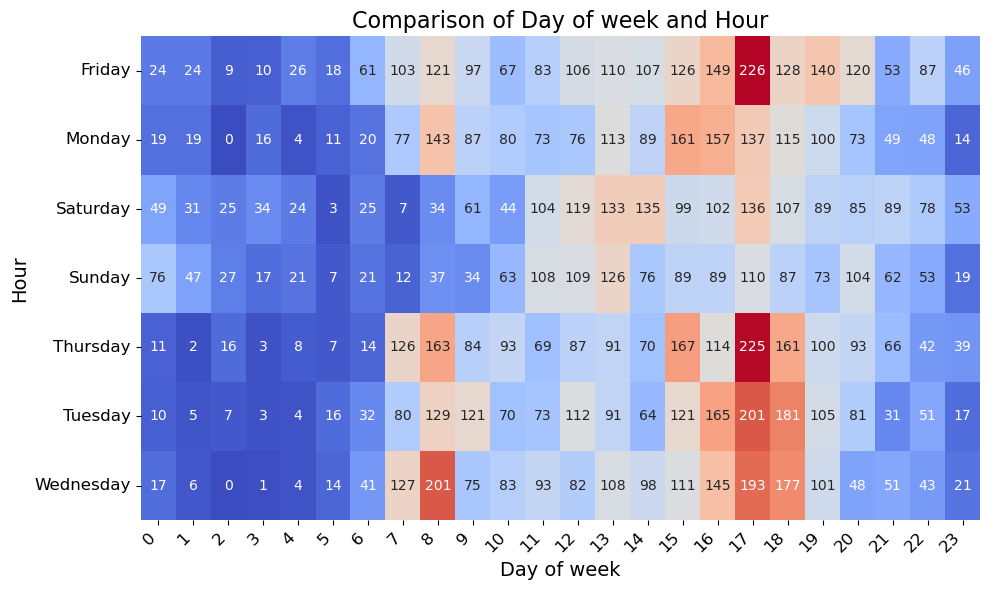

In [35]:
contingency_table = pd.crosstab(df_cleaned['Day_of_week'], df_cleaned['Hour'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Comparison of Day of week and Hour', fontsize=16)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Hour', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

>**We see that there are a number of strong associations that indicate more precise accident times such as:<br> Friday and Thursday at 5:00 pm and Wednesday at 8:00 am** 


>**Next, We examined a correlation between the hour of the day and the cause of the accident.**

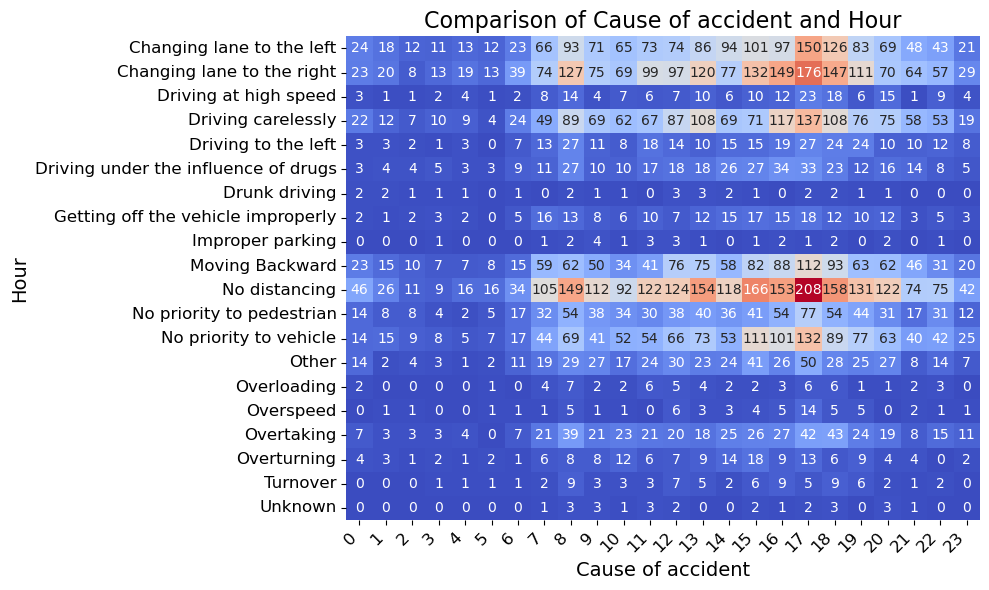

In [38]:
contingency_table = pd.crosstab(df_cleaned['Cause_of_accident'], df_cleaned['Hour'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Comparison of Cause of accident and Hour', fontsize=16)
plt.xlabel('Cause of accident', fontsize=14)
plt.ylabel('Hour', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

>**Conclusion:**<br>
>**In the graph above, we observed that the primary cause of accidents during peak hours is failure to maintain a safe distance. This finding suggests that between the busiest times of the day—specifically 5 PM and 8 AM, particularly on Thursdays and Fridays—traffic congestion and rush-hour conditions contribute significantly to this issue. Drivers may be hurrying to reach their destinations, leading to a higher incidence of accidents due to inadequate spacing between vehicles. Understanding these patterns can inform targeted traffic management and security strategies aimed at mitigating such risks effectively.** 

>**To our surprise, in the evening and night (from 8PM to 6AM) we see a minimal number of accidents. We would expect that when it is dark and visibility is low we would see more accidnets than during the day when visibility is better.** 

<center><img src="https://github.com/NoaKoren123/project1/blob/main/car3.jpg?raw=true" alt="Designer Image" style="width: 25%;"/></center>


<a id='section3'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
3. Second conclusion-cause of accident
</h1>
</a>

>**First we investigated the causes of the accidents:**

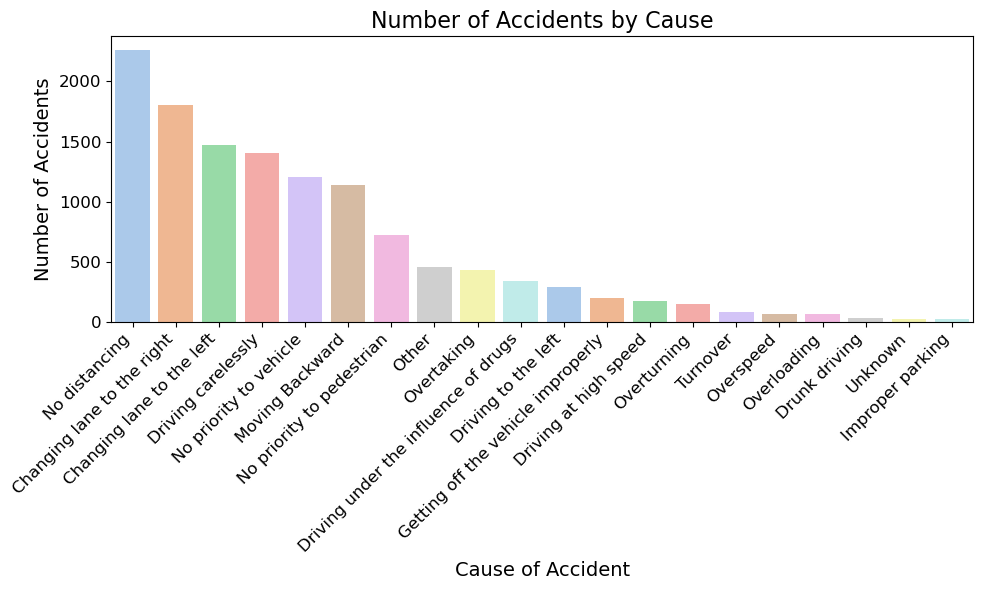

In [44]:
cause_counts = df['Cause_of_accident'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='pastel')
plt.title('Number of Accidents by Cause', fontsize=16)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

>**Above we see that the three main causes of accidents are not illegal.**

>**To see this conclusion more clearly, we seperated the accident causes to legal and illegal reasons:**

In [47]:
illegal =['Overloading','No priority to vehicle', 'No priority to pedestrian',
       'Improper parking', 'Overspeed',
       'Driving at high speed', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving']
df_cleaned['illegal'] = df_cleaned['Cause_of_accident'].isin(illegal)
df_cleaned.head(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_Range,Hour,illegal
0,2024-06-24 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,Afternoon (12 PM - 6 PM),17,False
1,2024-06-24 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,Afternoon (12 PM - 6 PM),17,False


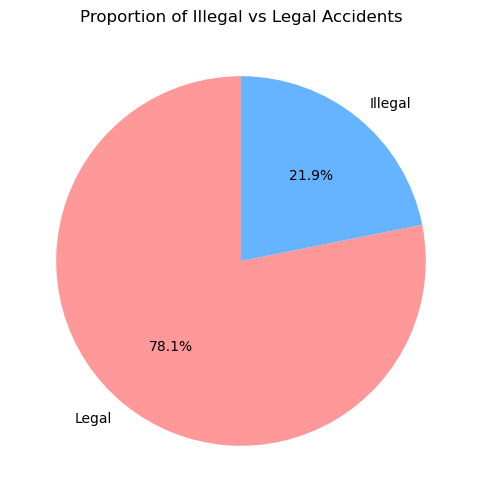

In [48]:
illegal_counts = df_cleaned['illegal'].value_counts()
illegal_counts_df = illegal_counts.reset_index()
illegal_counts_df.columns = ['Illegal', 'Count']
illegal_counts_df['Illegal'] = illegal_counts_df['Illegal'].map({True: 'Illegal', False: 'Legal'})
illegal_counts_df.set_index('Illegal').plot.pie(y='Count', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], legend=None, figsize=(6, 6))
plt.title('Proportion of Illegal vs Legal Accidents')
plt.ylabel('')  
plt.show()

>**This graph illustrates that the majority of accidents occur due to legal reasons, simple day to day actions that happen because of lack of attention. This opposes the seemingly obvious assumption that illegal actions such as driving under the influence or drinking and driving, would be a larger contributer to causing accidents.**

>**We then checked if this conclusion is still accurate while taking into account the severity of the injuries on average:**

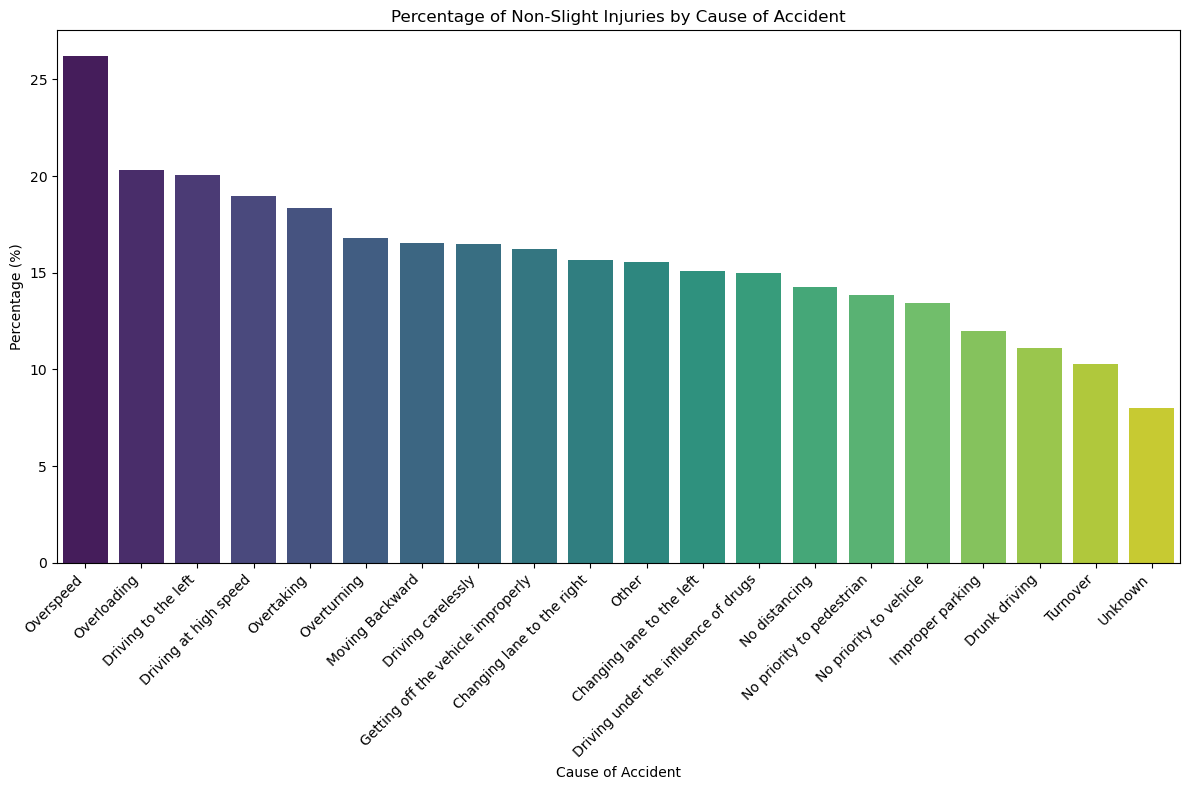

In [51]:
serious_injuries = df_cleaned
percentage_non_slight = serious_injuries.groupby('Cause_of_accident')['Accident_severity'].apply(lambda x: (x != 'Slight Injury').mean() * 100).reset_index()
percentage_non_slight.columns = ['Cause_of_accident', 'Percentage_non_slight']
percentage_non_slight = percentage_non_slight.sort_values(by='Percentage_non_slight', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Cause_of_accident', y='Percentage_non_slight', data=percentage_non_slight, palette='viridis')
plt.title('Percentage of Non-Slight Injuries by Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

>**This viewpoint shows us that on average, the severity of of accidents rises with illegal activity such as speeding. This provides us with an insights as to why certain actions are against the law, seeing as they have the highest fatality rates.**

>**In order to better understand the situation, we investigated further and found a video of one of the main junctions in this city:** 

<center><img src="https://github.com/NoaKoren123/project1/blob/main/junction.jpg?raw=true" alt="Designer Image" style="width: 50%;"/></center>

to see the gif we created you're welcome to look at our github link here: <br>
 'https://github.com/NoaKoren123/project1//raw/blob/main/Meskel_Square_Addis_Abeba.gif'

>**We see here that the streets in Addis Ababa Sub City are built very poorly. There aren't stop lights, road signs or proper markings on the roads. This illustrates more clearly why simple legal actions would result in an accident, and why so many of those accidents occur.**

<a id='section4'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
4. Third conclusion- years of experience
</h1>
</a>

>**One might think that the more experience a driver has, the less likely it is for them to have an accident. This is the assumption we questioned:**

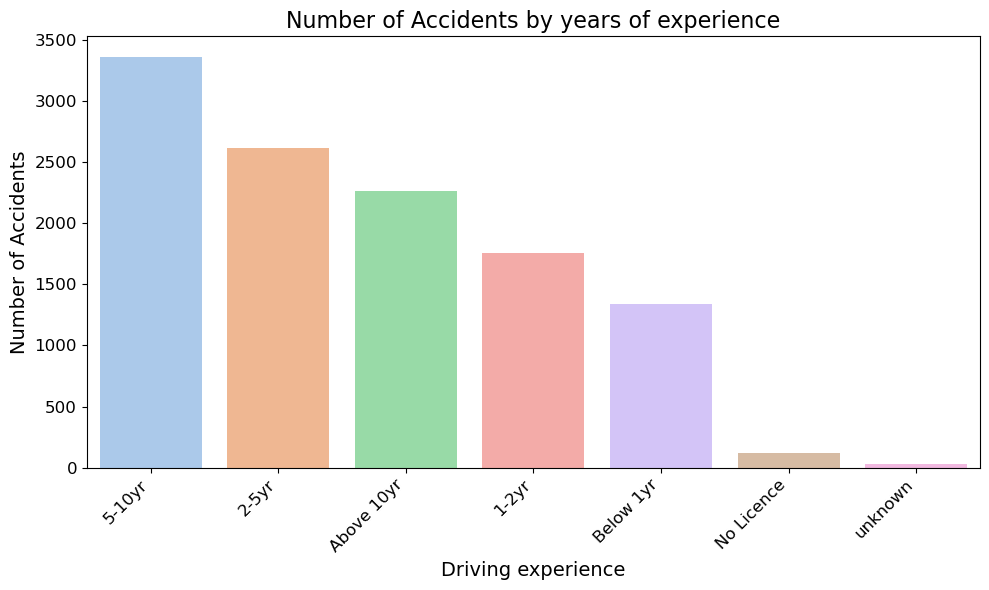

In [59]:
Driving_experience_counts = df_cleaned['Driving_experience'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=Driving_experience_counts.index, y=Driving_experience_counts.values, palette='pastel')
plt.title('Number of Accidents by years of experience', fontsize=16)
plt.xlabel('Driving experience', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

>**This graph presents the initial assumption was inaccurate. People with less years of experience driving (less than a year and 1-2 years) have a lower number of accidents. This as opposed to people with 5-10 years of experience who have many more accidents. For example, this goes against the isurance companies policy that less experienced drivers have the more expensive insurance plan.**

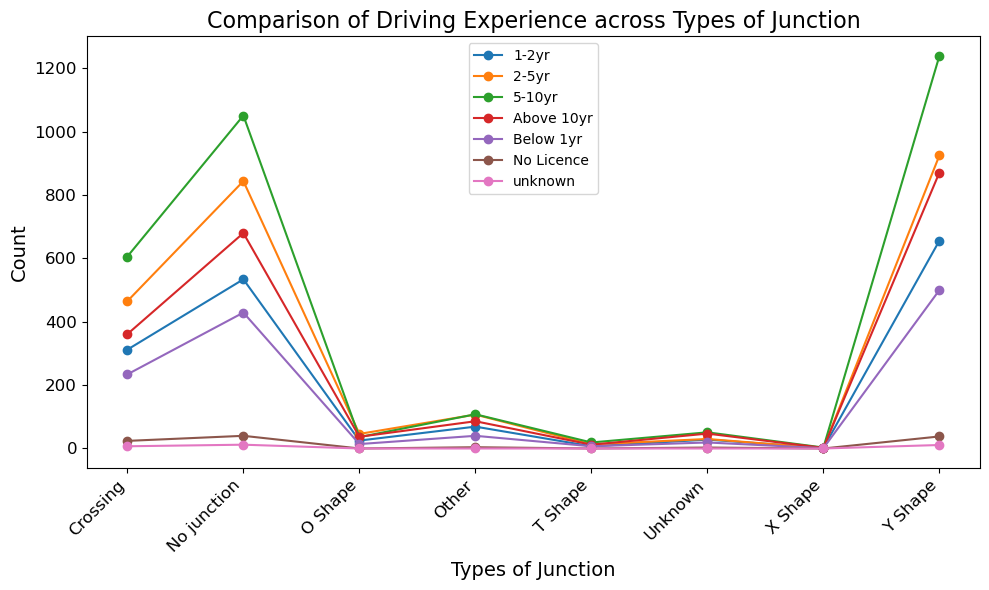

In [61]:
contingency_table = pd.crosstab(df_cleaned['Driving_experience'], df_cleaned['Types_of_Junction'])

plt.figure(figsize=(10, 6))

for driving_exp in contingency_table.index:
    plt.plot(contingency_table.columns, contingency_table.loc[driving_exp], marker='o', label=driving_exp)
plt.title('Comparison of Driving Experience across Types of Junction', fontsize=16)
plt.xlabel('Types of Junction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

>**We learned here that most accidents occur where there wasn't a junction or the Y shaped junction.**

>**Next we created a heatmap to compare driving experience and the movment of the vehicle:**

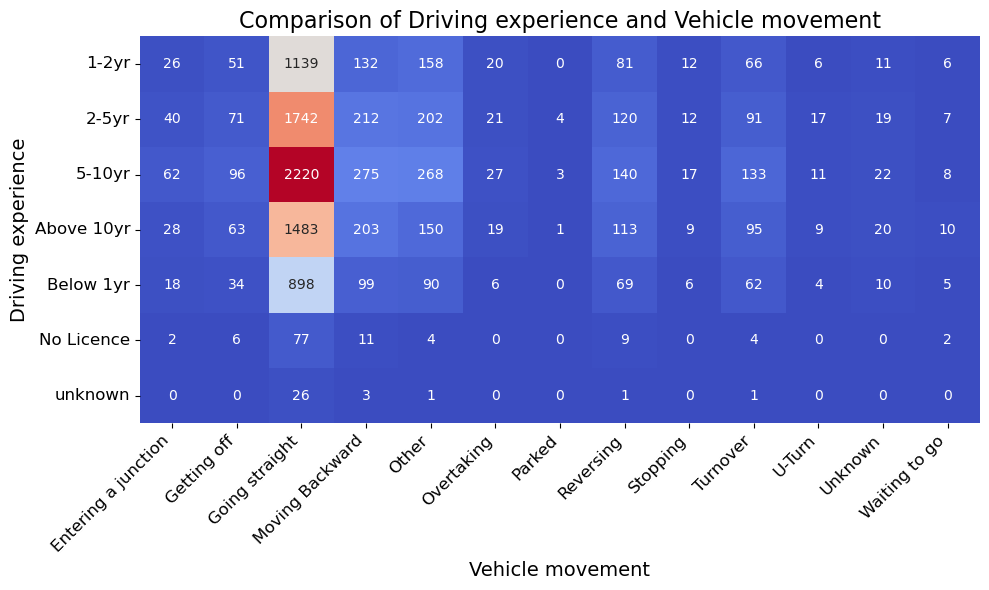

In [64]:
contingency_table = pd.crosstab(df_cleaned['Driving_experience'], df_cleaned['Vehicle_movement'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=False)

plt.title('Comparison of Driving experience and Vehicle movement', fontsize=16)
plt.xlabel('Vehicle movement', fontsize=14)
plt.ylabel('Driving experience', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

>**We investigated further and found that most of the accidents happened while driving in a straight line. This shows us that the accidents didn't happen because of compliacted movement, but because of simply going staright.**

>**Next we checked to see the compareson between cause and the drivers experience**

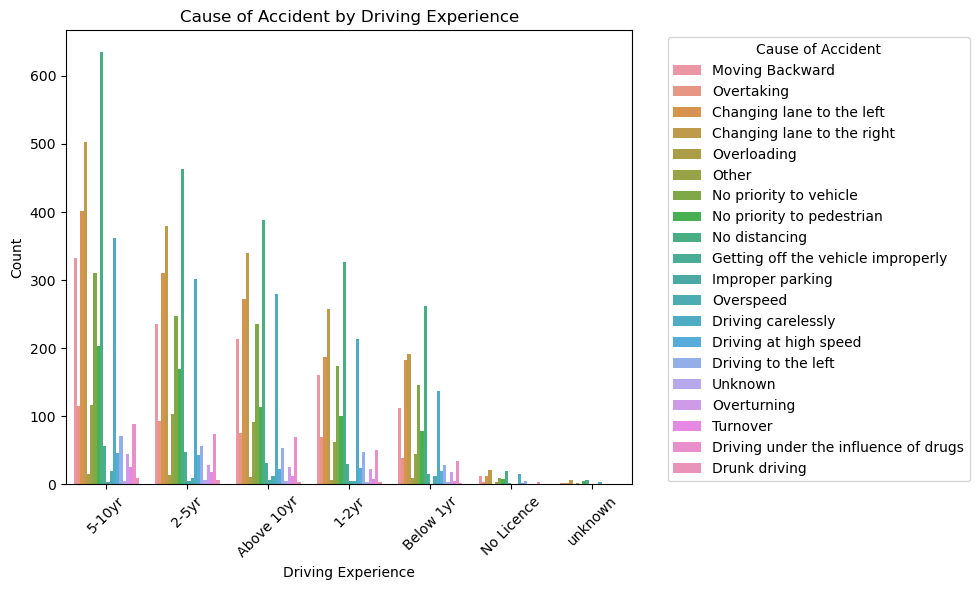

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Driving_experience', hue='Cause_of_accident', order=df['Driving_experience'].value_counts().index)
plt.title('Cause of Accident by Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

>**The chart highlights that certain causes of accidents, such as "No Priority to Vehicle" and "No Distancing", are prevalent across all levels of driving experience. However, drivers with 5-10 years of experience have the highest incident rates, indicating this period might require more targeted interventions for safety.** 

>**Our conclusion is that after a certain amount of years on the road, people bocome over confident and begin to drive carelessly.**

>**This conclusion helps to explain why in Israel, for example, 5 years after a driver gets their licence, they are legally required to do a refresher course in order to keep their licence.**

<a id='section5'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
5. Fourth conclusion- Sex of driver and amount of accidents
</h1>
</a>

<center><img src="https://github.com/NoaKoren123/project1/blob/main/Designer%20(2).jpeg?raw=true" alt="Designer Image" style="width: 30%;"/></center>


>**There is a stigma that woman are considered bad drivers compared to men. We checked to see if that is the case here.**

>**We investigated if there is a connection between the sex of the driver to the amount of accidents:**

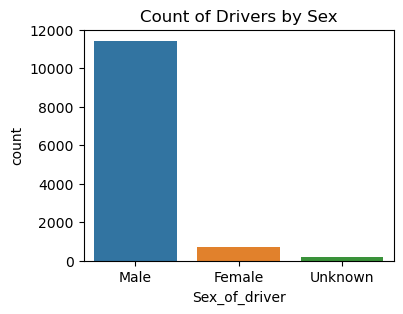

In [75]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_cleaned, x="Sex_of_driver")
plt.title('Count of Drivers by Sex')
plt.show()

>**From here we can see that by far there a more accidents caused by men than woman.**

>**We then checked the cause compared to each sex:**

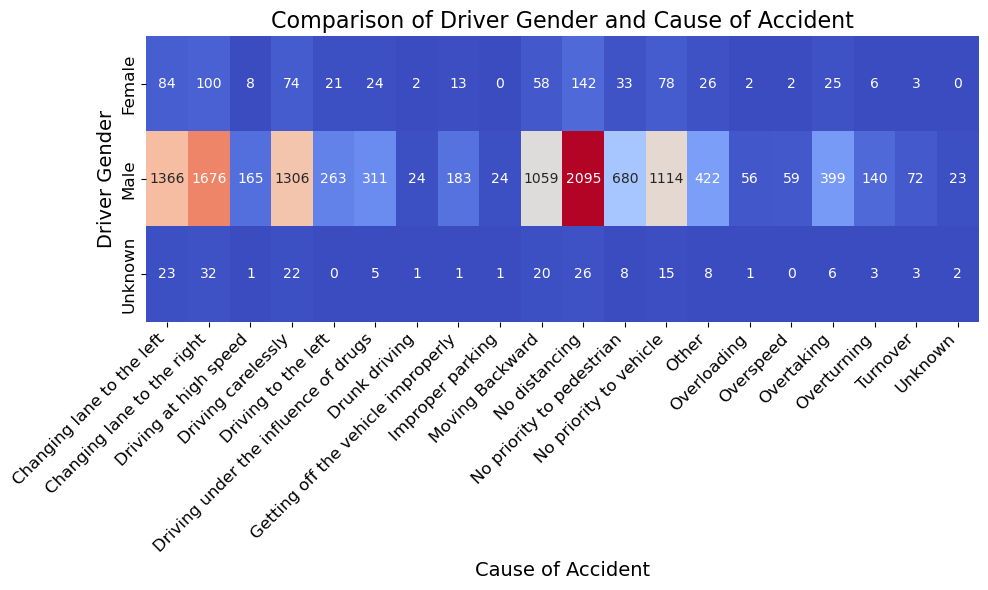

In [78]:
contingency_table = pd.crosstab(df['Sex_of_driver'], df['Cause_of_accident'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Comparison of Driver Gender and Cause of Accident', fontsize=16)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Driver Gender', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

>**We saw here that the top reasons are the same for men and woman.**

>**In order to be able to properly analize the situiation, we decided to search outside of our data to learn more.**

<img src="https://github.com/NoaKoren123/project1/blob/main/population.jpg?raw=true" alt="Designer Image" width="400" height="300" />

>**We can see here that the population numbers are even.**

>**From our research we learned that it has been acceptable for women to drive in Ethiopia since 1991. In fact, Ethiopia was one of the first African countries to lift restrictions on women driving.  There are no legal barriers preventing women from obtaining driver's licenses or driving vehicles in Ethiopia.**

>**From our data we cannot say for certain if the sex of the driver impcats the accident count, but outside research helps to break the stigma.**

<a id='section7'>
<h1 style="background-color:none; color:HotPink; text-align:left; font-size:none; font-family: serif; font-weight:bold; text-decoration: none;">
6. Summary
</h1>
</a>

## After thorough research across various aspects of our data, we uncovered intriguing and sometimes unexpected findings that challenged our initial assumptions. We aim to have broadened your perspective and encourage heightened caution during your future journeys behind the wheel. Drive safely!